In [4]:
predict_file = "/home/v-kunyan/v-kunyan/kunyan/kvlb/mmf/save/caption_coco2017_traced_encoder_decoder_23808544/reports/caption_coco2017_run_test_2020-11-01T08:50:45.json"
import json

result = json.load(open(predict_file,'r'))


In [5]:
len(result)


8573

In [7]:
image_ids = [item["image_id"] for item in result]

In [8]:
len(image_ids)

8573

In [9]:
image_ids = set(image_ids)

In [10]:
len(image_ids)

5000

In [127]:
train_anno_file = "/s1_md0/v-kunyan/kunyan/kvlb/mmf_cache/data/datasets/localized_narratives/defaults/annotations/coco_train_localized_narratives-0000{}-of-00004.jsonl"

In [131]:

synthesize_anno = []
for i in range(4):
    with open(train_anno_file.format(i),'r') as fin:
        for line in fin:
            item = json.loads(line)
            synthesize_anno.append([f"{str(item['image_id']).zfill(12)}.jpg", item['caption']])
#             train_image_ids.append(item['image_id'])
#             break
# one image multiple captions

In [133]:
len(synthesize_anno)

134272

In [134]:
# synthesize_anno
json.dump({"labels":synthesize_anno}, open("synthesize_anno.json","w"))

In [15]:
train_image_ids = []
for i in range(4):
    with open(train_anno_file.format(i),'r') as fin:
        for line in fin:
            item = json.loads(line)
            train_image_ids.append(item['image_id'])

train_image_ids = set(train_image_ids)

In [16]:
len(train_image_ids.intersection(image_ids))

0

In [17]:
len(train_image_ids)

118287

In [2]:
[] + None

TypeError: can only concatenate list (not "NoneType") to list

In [1]:
from PIL import Image
import json
image_base_folder = "/home/v-kunyan/v-kunyan/kunyan/kvlb/localized-narratives/data/images/coco/val2017"
prediction_base_file = "/home/v-kunyan/v-kunyan/kunyan/kvlb/mmf/save/evaluate-sweep_baseline_1_re_eval/search_sweep_baseline_1_bs_64_lr_6.838819e-06_abci/caption_coco2017_traced_encoder_decoder_21783736/reports/caption_coco2017_run_test_2020-11-19.json"
ground_truth_file = "/s1_md0/v-kunyan/kunyan/kvlb/mmf_cache/data/datasets/localized_narratives/defaults/annotations/coco_val_localized_narratives.jsonl"

ground_truth_caption = {}
with open(ground_truth_file,'r') as fin:
    for line in fin:
        anno = json.loads(line) 
        if anno['image_id'] not in ground_truth_caption:
            ground_truth_caption[anno['image_id']] = []  
        ground_truth_caption[anno['image_id']].append(anno['caption'])



prediction_base = json.load(open(prediction_base_file,'r'))
base_caption = {}
for item in prediction_base:
    if item["image_id"] not in base_caption:
        base_caption[item["image_id"]] = []
    base_caption[item["image_id"]].append(' '.join(item['caption']))


In [2]:

image_ids = list(ground_truth_caption.keys())
# image_ids = list(attention_map.keys())

print(type(image_ids[0]))
print(type(image_ids[0]))



<class 'str'>
<class 'str'>


In [3]:
class style():
    BLACK = '\033[30m'
    RED = '\033[31m'
    GREEN = '\033[32m'
    YELLOW = '\033[33m'
    BLUE = '\033[34m'
    MAGENTA = '\033[35m'
    CYAN = '\033[36m'
    WHITE = '\033[37m'
    UNDERLINE = '\033[4m'
    RESET = '\033[0m'

In [ ]:
21 24 29 30

GROUND TRUTH: 
 In the center of the image there are two elephants. At the bottom there is grass. In the background we can see hills and sky.
BASE: 
 in this picture we can see an elephant standing on the ground, in the background we can find some trees, sky with clouds.


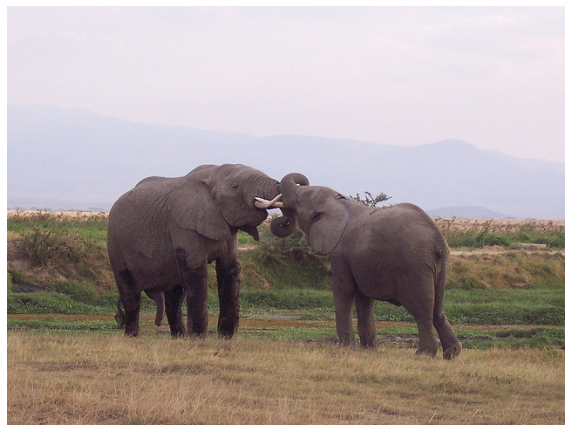

In [8]:
idx = 4
image_id = image_ids[idx]
im = Image.open(os.path.join(image_base_folder,f"{str(image_id).zfill(12)}.jpg"))
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,20)
import numpy as np
pix = im.load()
# for i in range(100,150):
#     for j in range(20,90):
#         pix[i,j] = 0
# pix[0:100,60:150]=0
# im.
plt.imshow(im)
plt.axis('off')

gt_cap = ground_truth_caption[image_id]
print(style.GREEN + "GROUND TRUTH:", '\n', ';\n'.join(gt_cap))
base_cap = list(set(base_caption[image_id]))
print(style.YELLOW + "BASE:",'\n',  ';'.join(base_cap))

In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, GridspecLayout
import ipywidgets as widgets
from IPython.display import display
import os
import matplotlib.pyplot as plt
import pickle
import numpy
# import transformer


In [8]:
import lmdb
env = lmdb.open(
    '/s1_md0/v-kunyan/kunyan/kvlb/mmf_cache/data/datasets/coco/defaults/features/coco_val2017.lmdb',
    max_readers=1,
    readonly=True,
    lock=False,
    readahead=False,
    meminit=False,
)

In [21]:

def f(idx, word_id):
    image_id = image_ids[idx]
    im = Image.open(os.path.join(image_base_folder,f"{str(image_id).zfill(12)}.jpg"))
    plt.rcParams["figure.figsize"] = (10,20)
    fig,ax = plt.subplots(1)
    ax.imshow(im)
    gt_cap = ground_truth_caption[image_id]
    print(style.GREEN + "GROUND TRUTH:", ';'.join(gt_cap))
    base_cap = base_caption[image_id]
    print(style.YELLOW + "BASE:", ';'.join(base_cap))
    attention_cap = attention_caption[image_id]
    print(style.CYAN + "ATTENTION:", ';'.join(attention_cap))
    with env.begin(write=False) as txn:
        key = f"{str(image_id).zfill(12)}".encode()
        feature_item = pickle.loads(txn.get(key))
        bboxes = feature_item['bbox']
        image_w = feature_item['image_width']
        image_h = feature_item['image_height']
        class_prob = feature_item['cls_prob']
#     attention_id = attention[word_id]
#     print(attention_map[image_id])
    for bbox in bboxes:
        x = bbox[0] 
        y = bbox[1]
        w = bbox[2] - bbox[0]
        h = bbox[3] - bbox[1]
        ax.add_patch(plt.Rectangle((x,y),w,h,linewidth=1,edgecolor='g',facecolor='none'))
    raw_cap, att_map = trace_concat_caption_attn[image_id][0]
    print(style.RESET,' '.join(raw_cap))
    raw_token = raw_cap[word_id+1]
    print(style.RESET, raw_token)
    attention_id = att_map[word_id]
    bbox = bboxes[attention_id]
    x = bbox[0] 
    y = bbox[1]
    w = bbox[2] - bbox[0]
    h = bbox[3] - bbox[1]
    print(bbox)
#     print(len(class_prob[attention_id]))
#     print(numpy.argmax(class_prob[attention_id]))
    print((image_w,image_h))
    ax.add_patch(plt.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none'))

#     print(im.size)

interact(f, idx=range(len(image_ids)),word_id=range(64))

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

<function __main__.f(idx, word_id)>

In [93]:
from nltk.corpus import stopwords